# 图像的几何变换

### 目标

- 学习将不同的几何变换应用到图像上，如平移、旋转、仿射变换等。
- 你会看到这些函数: **cv.getPerspectiveTransform**

### 变换

OpenCV提供了两个转换函数**cv.warpAffine**和**cv.warpPerspective**，您可以使用它们进行各种转换。**cv.warpAffine**采用2x3转换矩阵，而**cv.warpPerspective**采用3x3转换矩阵作为输入。

#### 缩放

缩放只是调整图像的大小。为此，OpenCV带有一个函数**cv.resize()**。图像的大小可以手动指定，也可以指定缩放比例。也可使用不同的插值方法。首选的插值方法是**cv.INTER_AREA**用于缩小，**cv.INTER_CUBIC**（慢）和**cv.INTER_LINEAR**用于缩放。默认情况下，出于所有调整大小的目的，使用的插值方法为**cv.INTER_LINEAR**。您可以使用以下方法调整输入图像的大小：

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('data/messi5.jpg')

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

In [2]:
#或者
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

#### 平移

平移是物体位置的移动。如果您知道在(x,y)方向上的位移，则将其设为($t_x$,$t_y$)，你可以创建转换矩阵$\mathbf{M}$，如下所示：

$$
M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}
$$

您可以将其放入**np.float32**类型的Numpy数组中，并将其传递给**cv.warpAffine**函数。参见下面偏移为(100, 50)的示例：

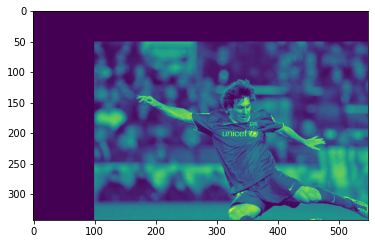

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/messi5.jpg',0)

rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()

**警告**

**cv.warpAffine**函数的第三个参数是输出图像的大小，其形式应为`(width，height)`。记住`width` =列数，`height` =行数。

#### 旋转

图像旋转角度为$θ$是通过以下形式的变换矩阵实现的：

$$
M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
$$

但是OpenCV提供了可缩放的旋转以及可调整的旋转中心，因此您可以在自己喜欢的任何位置旋转。修改后的变换矩阵为

$$
\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}
$$

其中：

$$
\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}
$$

为了找到此转换矩阵，OpenCV提供了一个函数**cv.getRotationMatrix2D**。请检查以下示例，该示例将图像相对于中心旋转90度而没有任何缩放比例。

In [4]:
img = cv.imread('data/messi5.jpg',0)

rows,cols = img.shape

# cols-1 和 rows-1 是坐标限制
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

#### 仿射变换

在仿射变换中，原始图像中的所有平行线在输出图像中仍将平行。为了找到变换矩阵，我们需要输入图像中的三个点及其在输出图像中的对应位置。然后**cv.getAffineTransform**将创建一个2x3矩阵，该矩阵将传递给**cv.warpAffine**。

查看以下示例，并查看我选择的点（以绿色标记）：

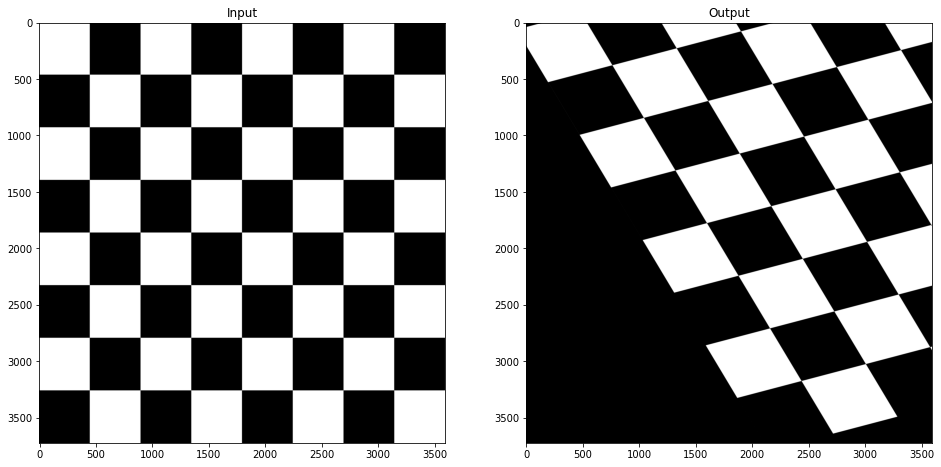

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/chessboard.png')

rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### 透视变换

对于透视变换，您需要3x3变换矩阵。即使在转换后，直线也将保持直线。要找到此变换矩阵，您需要在输入图像上有4个点，在输出图像上需要相应的点。在这四个点中，其中三个不应共线。然后可以通过函数**cv.getPerspectiveTransform**找到变换矩阵。然后将**cv.warpPerspective**应用于此3x3转换矩阵。

请参见下面的代码：

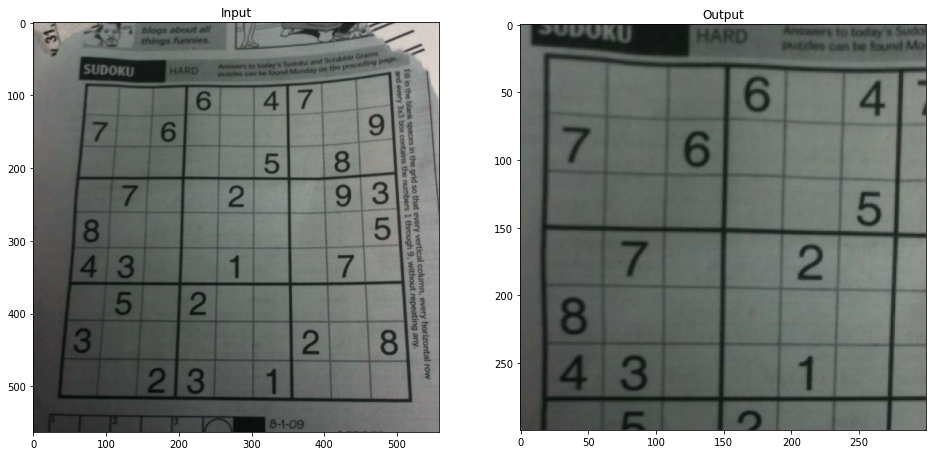

In [6]:
img = cv.imread('data/sudoku.png')

rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 其他资源

1. "Computer Vision: Algorithms and Applications", Richard Szeliski

### 练习题